### Import libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
from skimage import io
import sys
import seaborn as sns
from scipy import spatial

In [2]:
sys.path.insert(1, "/Users/k1801626/OneDrive - King's College London/git/AFT-Alignment_by_Fourier_Transform/Python_implementation/")
import AFT_tools as AFT       

### Import data (csv tracks and images)

In [72]:
input_folder = "/Users/k1801626/OneDrive - King's College London/data/JP/AFT_track/"

In [79]:
spots_list = glob.glob(input_folder+'*Spots.csv')

print(*spots_list, sep="\n")

/Users/k1801626/OneDrive - King's College London/data/JP/AFT_track/merged_Spots.csv


In [74]:
tracks_list = glob.glob(input_folder+'*Tracks.csv')

print(*tracks_list, sep="\n")

/Users/k1801626/OneDrive - King's College London/data/JP/AFT_track/merged_Tracks.csv


In [75]:
image_list = glob.glob(input_folder+'ctrl/clahe*.tif')

print(*image_list, sep="\n")

/Users/k1801626/OneDrive - King's College London/data/JP/AFT_track/ctrl/clahe_Position 6.tif
/Users/k1801626/OneDrive - King's College London/data/JP/AFT_track/ctrl/clahe_Position 12.tif


### Parameters

In [76]:
single_frame = False

### Load data

In [77]:
file_list = 0

In [80]:
df_spots = pd.read_csv(spots_list[file_list])
df_spots.head()

,LABEL,ID,TRACK_ID,QUALITY,POSITION_X,POSITION_Y,POSITION_Z,POSITION_T,FRAME,RADIUS,...,PERIMETER,CIRCULARITY,SOLIDITY,SHAPE_INDEX,File_name_raw,Condition,experiment_nb,File_name,Repeat,Unique_ID
0,ID2560,2560,1,113788.0,446.481612,463.926373,0.0,26.0,26,190.336445,...,1850.608931,0.417613,0.884730,5.485520,Position_26,siCCT8_si5,R1,siCCT8_si5_R1_Position_26,1,siCCT8_si5_R1_Position_26_1
1,ID2435,2435,1,64912.0,186.902997,251.383041,0.0,1.0,1,143.727227,...,1103.639245,0.669551,0.961309,4.332246,Position_26,siCCT8_si5,R1,siCCT8_si5_R1_Position_26,1,siCCT8_si5_R1_Position_26_1
2,ID2563,2563,1,111268.0,432.193334,454.720643,0.0,27.0,27,188.187463,...,1845.354851,0.410564,0.845194,5.532409,Position_26,siCCT8_si5,R1,siCCT8_si5_R1_Position_26,1,siCCT8_si5_R1_Position_26_1
3,ID2437,2437,1,71143.0,230.466989,274.844695,0.0,4.0,4,150.484286,...,1161.466995,0.662717,0.959538,4.354525,Position_26,siCCT8_si5,R1,siCCT8_si5_R1_Position_26,1,siCCT8_si5_R1_Position_26_1
4,ID2565,2565,1,123560.0,441.649200,460.855612,0.0,28.0,28,198.340124,...,1885.321437,0.436928,0.854008,5.362902,Position_26,siCCT8_si5,R1,siCCT8_si5_R1_Position_26,1,siCCT8_si5_R1_Position_26_1


In [81]:
df_tracks = pd.read_csv(tracks_list[file_list])
df_tracks.head()

,LABEL,TRACK_INDEX,TRACK_ID,DIVISION_TIME_MEAN,DIVISION_TIME_STD,NUMBER_SPOTS,NUMBER_GAPS,NUMBER_SPLITS,NUMBER_MERGES,NUMBER_COMPLEX,...,CONFINEMENT_RATIO,MEAN_STRAIGHT_LINE_SPEED,LINEARITY_OF_FORWARD_PROGRESSION,MEAN_DIRECTIONAL_CHANGE_RATE,File_name_raw,Condition,experiment_nb,File_name,Repeat,Unique_ID
0,Track_1,1,1,NaN,NaN,76,0,0,0,0,...,0.651187,10.556033,0.651187,1.235458,Position_26,siCCT8_si5,R1,siCCT8_si5_R1_Position_26,1,siCCT8_si5_R1_Position_26_1
1,Track_2,2,2,NaN,NaN,55,0,0,0,0,...,0.013550,0.361223,0.013550,1.681933,Position_26,siCCT8_si5,R1,siCCT8_si5_R1_Position_26,1,siCCT8_si5_R1_Position_26_2
2,Track_3,3,3,NaN,NaN,76,0,0,0,0,...,0.149645,1.959934,0.149645,1.803235,Position_26,siCCT8_si5,R1,siCCT8_si5_R1_Position_26,1,siCCT8_si5_R1_Position_26_3
3,Track_4,4,4,NaN,NaN,76,0,0,0,0,...,0.044778,0.713082,0.044778,1.874086,Position_26,siCCT8_si5,R1,siCCT8_si5_R1_Position_26,1,siCCT8_si5_R1_Position_26_4
4,Track_8,8,8,NaN,NaN,29,0,0,0,0,...,0.140809,2.646769,0.140809,1.866365,Position_26,siCCT8_si5,R1,siCCT8_si5_R1_Position_26,1,siCCT8_si5_R1_Position_26_8


In [30]:
movie_list = df_spots.File_name.unique()
print(*movie_list, sep="\n")

siCCT8_si5_R1_Position_26_spots
siCCT8_si5_R2_Position_27_spots
siCCT8_si8_R1_Position_31_spots
siCCT8_si8_R2_Position_33_spots
siCTRL_R1_Position_6_spots
siCTRL_R2_Position_12_spots


In [82]:
image_list

["/Users/k1801626/OneDrive - King's College London/data/JP/AFT_track/ctrl/clahe_Position 6.tif",
 "/Users/k1801626/OneDrive - King's College London/data/JP/AFT_track/ctrl/clahe_Position 12.tif"]

In [64]:
position_list = []
for movie in range(len(movie_list)):
    position_list = np.append(position_list, movie_list[movie].split("_")[-2:-1])

In [65]:
position_list

array(['26', '27', '31', '33', '6', '12'], dtype='<U32')

### Load images

In [69]:
str(position_list[-1])

'12'

In [84]:
if str(position_list[-1]) in image_list[1]:
    print("Yes! it is present in the string")
else:
    print("No! it is not present")

Yes! it is present in the string


In [83]:
image_list[0]

"/Users/k1801626/OneDrive - King's College London/data/JP/AFT_track/ctrl/clahe_Position 6.tif"

In [51]:
image_list_current_file = []
for position in range(len(position_list)):
    

["/Users/k1801626/OneDrive - King's College London/data/JP/AFT_track/ctrl/clahe_Position 6.tif",
 "/Users/k1801626/OneDrive - King's College London/data/JP/AFT_track/ctrl/clahe_Position 12.tif"]

In [17]:
im = io.imread(image_list[file_list])
im.shape

(118, 1608, 1432)

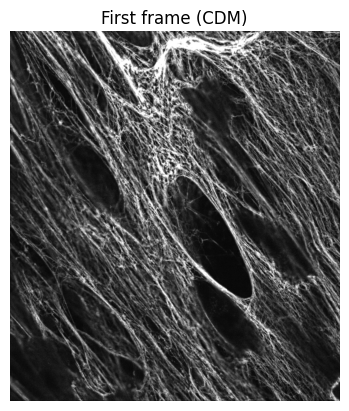

In [22]:
plt.imshow(im[0,], cmap='gray')

plt.title('First frame (CDM)')
plt.axis('off')
plt.show()

### Run AFT

In [24]:
#### required AFT parameters ####
window_size = 100
overlap = 0.6
neighborhood_radius = 5

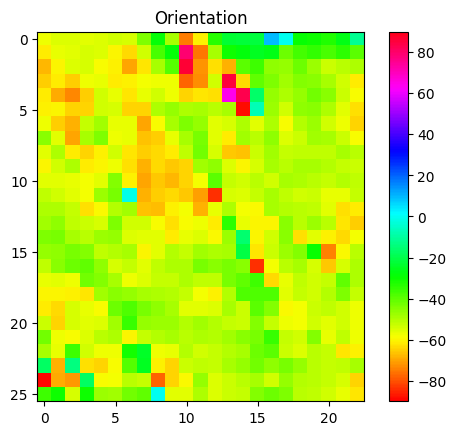

<Figure size 640x480 with 0 Axes>

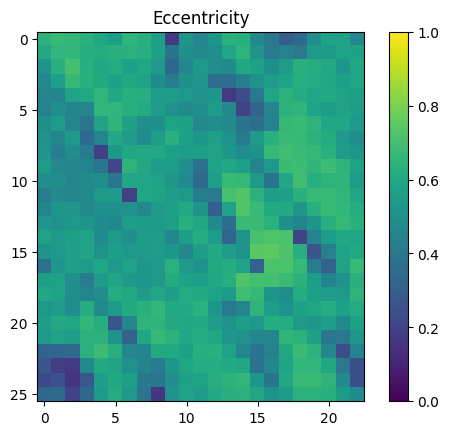

<Figure size 640x480 with 0 Axes>

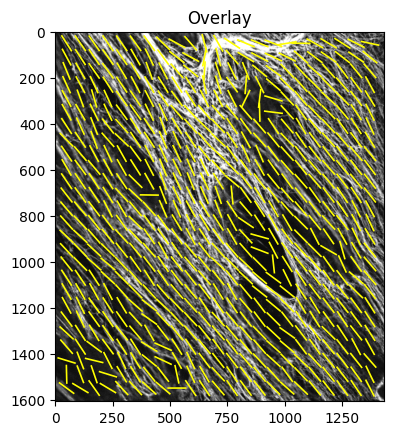

<Figure size 640x480 with 0 Axes>

In [27]:
#### output parameters ####
plot_overlay = True
plot_angles = True
plot_eccentricity = True
save_figures = False
data_save_path = input_folder+'output_data/'

# run on first frame and display output
x, y, u, v, im_theta, im_eccentricity = AFT.image_local_order(im[0,], window_size, overlap, save_path = data_save_path,
                                                             plot_overlay=plot_overlay, plot_angles=plot_angles, 
                                                             plot_eccentricity=plot_eccentricity,
                                                             save_figures=data_save_path)

In [28]:
#### output parameters ####
plot_overlay = False
plot_angles = False
plot_eccentricity = False
save_figures = False
data_save_path = input_folder+'output_data/'

# run on all frames
x, y, u, v, im_theta, im_eccentricity = AFT.image_local_order(im, window_size, overlap, save_path = data_save_path,
                                                             plot_overlay=plot_overlay, plot_angles=plot_angles, 
                                                             plot_eccentricity=plot_eccentricity,
                                                             save_figures=data_save_path)